In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL',start,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.988724,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.054344,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.424393,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.397675,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.815491,144114400


In [5]:
df1 = df.reset_index()
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [6]:
df2 = df1.drop(['Date','Adj Close'],axis=1)
df2.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [7]:
df2.shape

(2515, 5)

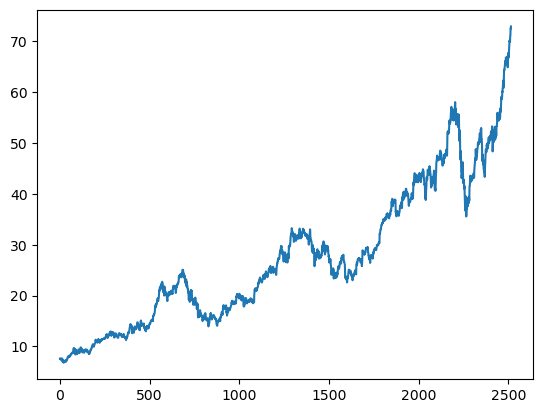

In [8]:
plt.plot(df2.Close)

In [9]:
ma100 = df2.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

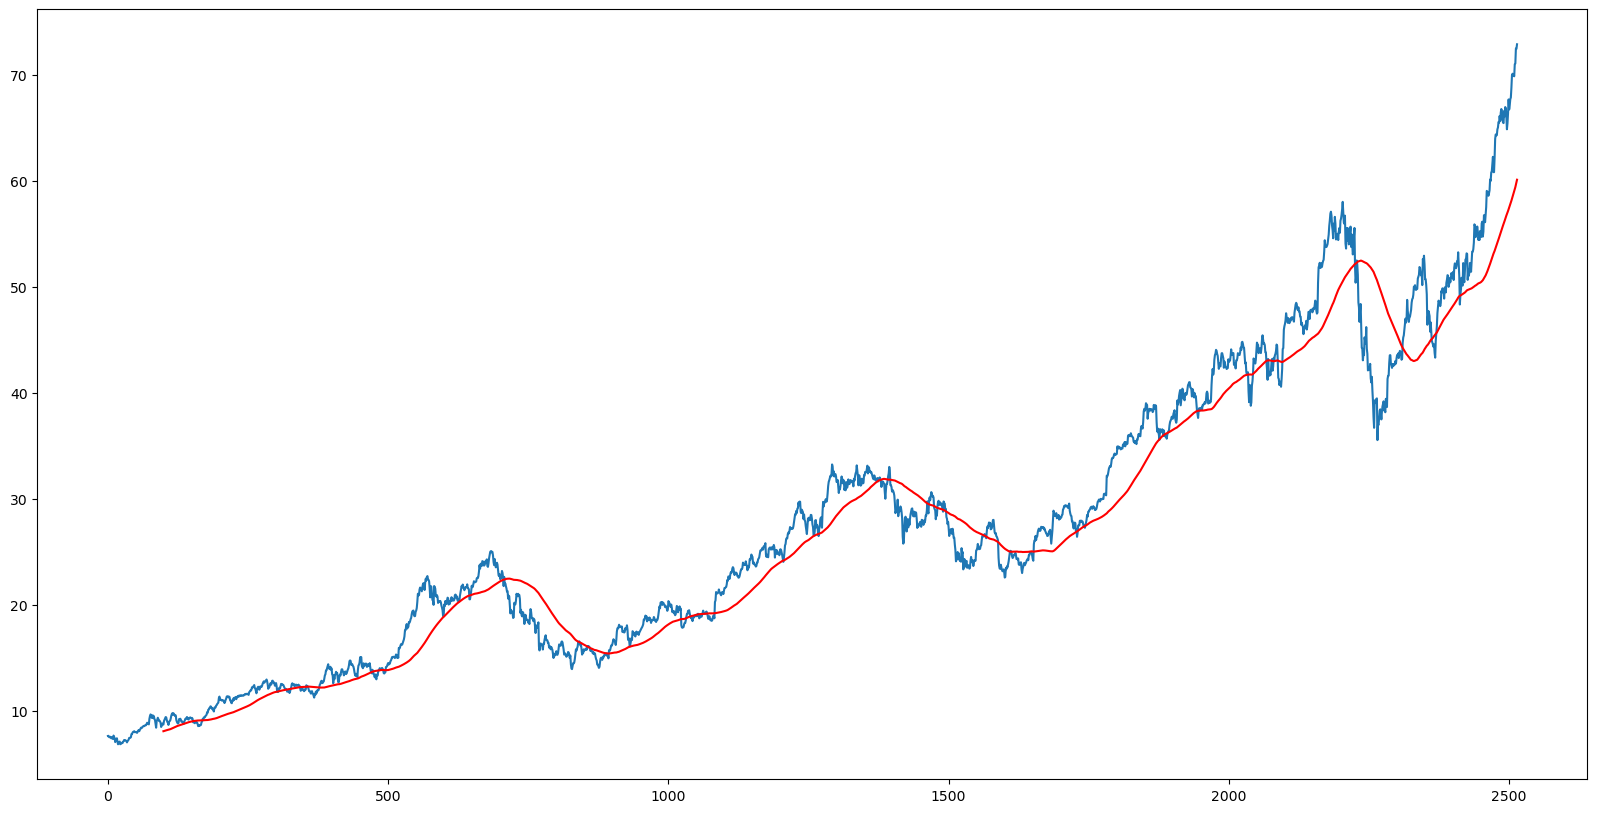

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df2.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df2.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

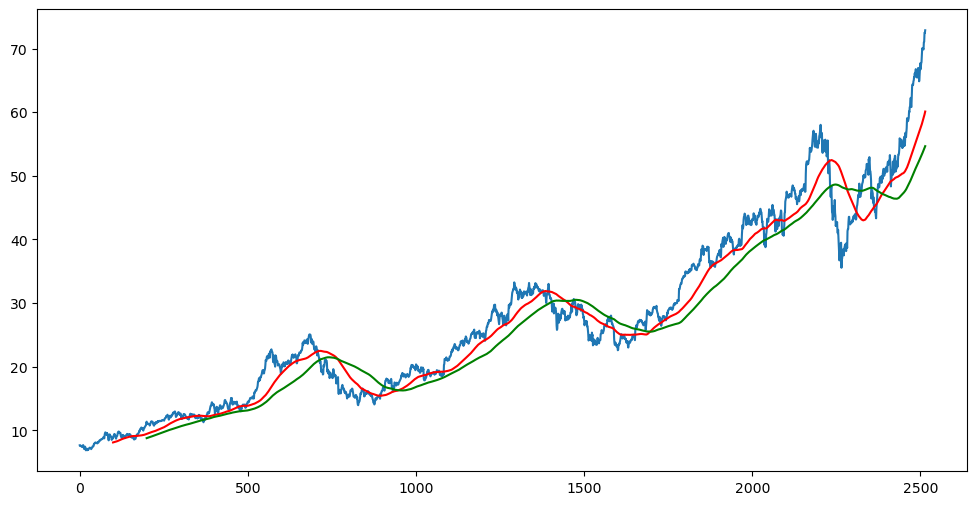

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df2.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df2.shape

(2515, 5)

In [14]:
data_training = pd.DataFrame(df2['Close'][0:int(len(df2)*0.70)])
data_testing = pd.DataFrame(df2['Close'][int(len(df2)*0.70):int(len(df))])

In [15]:
data_training.shape

(1760, 1)

In [16]:
data_testing.shape

(755, 1)

In [17]:
data_training

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [18]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [19]:
data_testing

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


scaling data between 0 and 1

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [22]:
data_training_array.shape

(1760, 1)

In [48]:
data_testing_array = scaler.fit_transform(data_testing)
data_testing_array

array([[0.0051793 ],
       [0.        ],
       [0.00187821],
       [0.00113829],
       [0.00449631],
       [0.0118953 ],
       [0.01804211],
       [0.01872511],
       [0.02236768],
       [0.01952192],
       [0.0183267 ],
       [0.02379056],
       [0.02373363],
       [0.02253841],
       [0.02379056],
       [0.02424589],
       [0.02361982],
       [0.0344906 ],
       [0.03483212],
       [0.034889  ],
       [0.03306772],
       [0.0314741 ],
       [0.07359136],
       [0.07233921],
       [0.07546957],
       [0.08235626],
       [0.08941377],
       [0.09231642],
       [0.09447922],
       [0.09277175],
       [0.09943082],
       [0.10927721],
       [0.112066  ],
       [0.11115542],
       [0.11326126],
       [0.11883892],
       [0.12117247],
       [0.11787137],
       [0.1186113 ],
       [0.12014795],
       [0.12048951],
       [0.1364257 ],
       [0.13170181],
       [0.13636881],
       [0.13386453],
       [0.13488905],
       [0.13192943],
       [0.130

In [49]:
def create_data_array(data_array,time_step=1):
    dataX = []
    datay = []
    for i in range(time_step,data_array.shape[0]):
        a = data_array[i-time_step:i,0]
        dataX.append(a)
        datay.append(data_array[i,0])
    return np.array(dataX),np.array(datay)

In [50]:
time_step = 100
X_train,y_train = create_data_array(data_training_array,time_step)
X_test,y_test = create_data_array(data_testing_array,time_step)

In [51]:
X_train.shape,y_train.shape

((1660, 100), (1660,))

In [52]:
X_test.shape,y_test.shape

((655, 100), (655,))

ML Model

In [53]:
X_train[:5]

array([[2.97178191e-02, 3.02185410e-02, 2.56038878e-02, 2.50760817e-02,
        2.69706691e-02, 2.44400837e-02, 2.12057268e-02, 2.51708129e-02,
        2.35198380e-02, 1.87833875e-02, 3.11116846e-02, 2.66323796e-02,
        2.16793646e-02, 7.71362572e-03, 1.49130326e-02, 1.87969205e-02,
        2.14222733e-02, 9.79765742e-03, 1.35149573e-05, 3.62674239e-03,
        5.15593812e-03, 9.71645927e-03, 0.00000000e+00, 4.61461711e-03,
        2.80124591e-03, 5.60252796e-03, 4.15451231e-03, 8.95862792e-03,
        1.12727391e-02, 1.53596224e-02, 1.42093514e-02, 1.47235702e-02,
        1.30184452e-02, 1.13268532e-02, 6.77986503e-03, 1.16516638e-02,
        1.34650350e-02, 1.70105973e-02, 2.29244210e-02, 2.27349587e-02,
        2.33844897e-02, 2.52520110e-02, 3.64029891e-02, 3.65789184e-02,
        4.19108039e-02, 4.43737423e-02, 4.52668858e-02, 4.67555186e-02,
        4.30204939e-02, 4.38459723e-02, 4.33994006e-02, 4.41166329e-02,
        4.08687790e-02, 4.42519631e-02, 4.91372588e-02, 5.050407

In [54]:
y_train[:5]

array([0.08295551, 0.08773258, 0.093078  , 0.09730023, 0.09617701])

In [55]:
y_test.shape

(655,)

In [56]:
X_test.shape

(655, 100)

In [57]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [58]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [36]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

C:\Users\DELL\stocks\env\Lib\site-packages\keras\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - loss: 0.1180 - val_loss: 0.0105
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4

In [70]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.4491e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


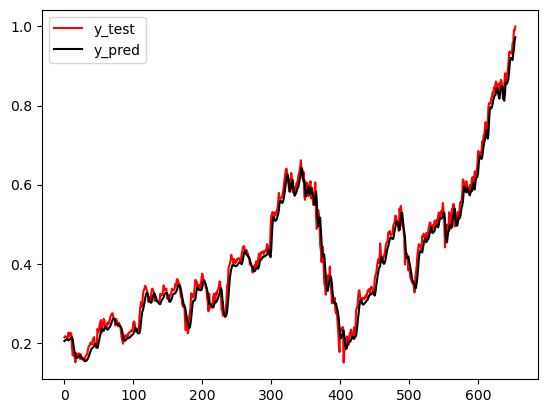

In [79]:
x = np.arange(X_test.shape[0])
plt.plot(x,y_test,color='red',label='y_test')
plt.plot(x,y_pred,color='black',label='y_pred')
plt.legend()

In [74]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [62]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [66]:
# calculating RMSE performance metrics
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_train,train_predict))

52.69014617242279

In [64]:
math.sqrt(mean_squared_error(y_test,test_predict))

47.67029671851179

In [83]:
X_train.shape

(1660, 100, 1)

In [85]:
y_train.shape

(1660,)

In [95]:
x = X_train[:1]

In [99]:
model.predict(x)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


0.06958318

In [102]:
model.save('stockpredict.h5')

In [105]:
y_predicted = model.predict(X_test)
y_predicted = scaler.inverse_transform(y_predicted)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


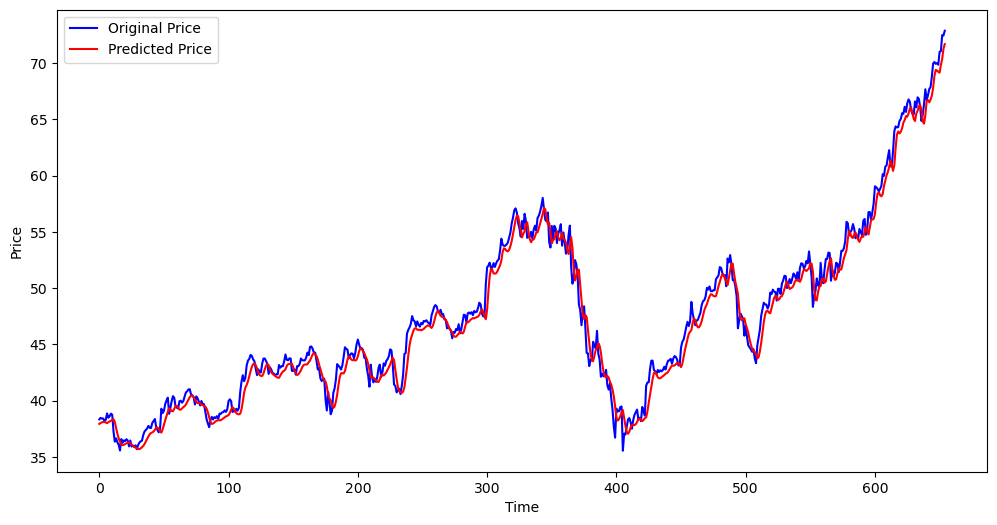

In [106]:
fig2 = plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()